In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhushan092","key":"e5f84639e348c6f92ac8368b77a7b6c3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Dataset

In [4]:
#loading the dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 65% 106M/163M [00:00<00:00, 1.10GB/s]
100% 163M/163M [00:00<00:00, 678MB/s] 


In [5]:
#extract the compressed dataset
from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [7]:
#necessary imports
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3671.jpg', 'with_mask_2892.jpg', 'with_mask_1804.jpg', 'with_mask_1501.jpg', 'with_mask_2186.jpg']
['with_mask_2850.jpg', 'with_mask_660.jpg', 'with_mask_2754.jpg', 'with_mask_1867.jpg', 'with_mask_2824.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_410.jpg', 'without_mask_164.jpg', 'without_mask_1998.jpg', 'without_mask_961.jpg', 'without_mask_1129.jpg']
['without_mask_580.jpg', 'without_mask_2893.jpg', 'without_mask_2763.jpg', 'without_mask_746.jpg', 'without_mask_1460.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


### Creating Labels

For the two class of images.

with mask - 1 |
without mask - 0

In [11]:
#create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Display the images

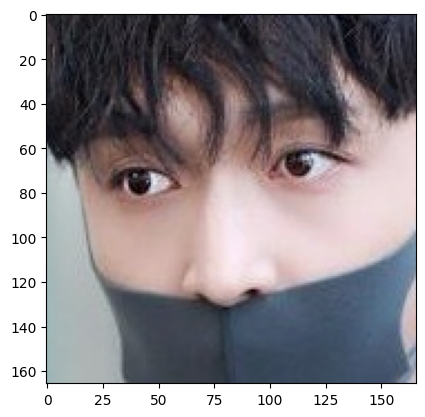

In [15]:
#display images with mask
img = mpimg.imread('/content/data/with_mask/with_mask_1005.jpg')
imgplot = plt.imshow(img)
plt.show()

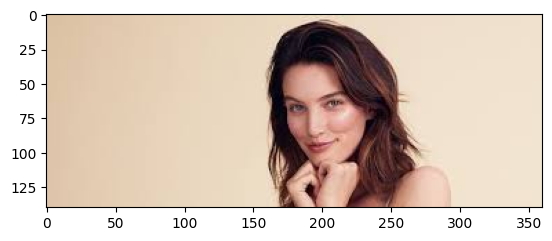

In [16]:
#without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1010.jpg')
imgplot = plt.imshow(img)
plt.show()

## Image Processing

1. Resize the Images
2. Convert the images to numpy arrays

In [17]:
# convert images to numpy arrays+
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
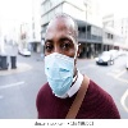

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


## Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the dat
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[ 81,  81,  81],
        [ 82,  82,  82],
        [ 87,  87,  87],
        ...,
        [128, 128, 128],
        [114, 114, 114],
        [106, 106, 106]],

       [[ 70,  70,  70],
        [ 73,  73,  73],
        [ 79,  79,  79],
        ...,
        [120, 120, 120],
        [108, 108, 108],
        [103, 103, 103]],

       [[ 71,  71,  71],
        [ 75,  75,  75],
        [ 83,  83,  83],
        ...,
        [120, 120, 120],
        [108, 108, 108],
        [103, 103, 103]],

       ...,

       [[  3,   3,   3],
        [  6,   6,   6],
        [ 13,  13,  13],
        ...,
        [154, 154, 154],
        [150, 150, 150],
        [160, 160, 160]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  8,   8,   8],
        ...,
        [156, 156, 156],
        [166, 166, 166],
        [177, 177, 177]],

       [[  3,   3,   3],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [163, 163, 163],
        [184, 184, 184],
        [157, 157, 157]]], dtype=uint8)
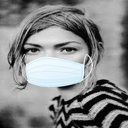

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.31764706, 0.31764706, 0.31764706],
        [0.32156863, 0.32156863, 0.32156863],
        [0.34117647, 0.34117647, 0.34117647],
        ...,
        [0.50196078, 0.50196078, 0.50196078],
        [0.44705882, 0.44705882, 0.44705882],
        [0.41568627, 0.41568627, 0.41568627]],

       [[0.2745098 , 0.2745098 , 0.2745098 ],
        [0.28627451, 0.28627451, 0.28627451],
        [0.30980392, 0.30980392, 0.30980392],
        ...,
        [0.47058824, 0.47058824, 0.47058824],
        [0.42352941, 0.42352941, 0.42352941],
        [0.40392157, 0.40392157, 0.40392157]],

       [[0.27843137, 0.27843137, 0.27843137],
        [0.29411765, 0.29411765, 0.29411765],
        [0.3254902 , 0.3254902 , 0.3254902 ],
        ...,
        [0.47058824, 0.47058824, 0.47058824],
        [0.42352941, 0.42352941, 0.42352941],
        [0.40392157, 0.40392157, 0.40392157]],

       ...,

       [[0.01176471, 0.01176471, 0.01176471],
        [0.02352941, 0.02352941, 0.02352941],
        [0.05098039, 0

## Building CNN

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
#train model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 128s 735ms/step - acc: 0.6728 - loss: 0.6739 - val_acc: 0.8843 - val_loss: 0.2801
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 125s 738ms/step - acc: 0.8654 - loss: 0.3414 - val_acc: 0.8860 - val_loss: 0.2691
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 738ms/step - acc: 0.8982 - loss: 0.2618 - val_acc: 0.8975 - val_loss: 0.2183
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 735ms/step - acc: 0.9006 - loss: 0.2299 - val_acc: 0.8959 - val_loss: 0.2807
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 735ms/step - acc: 0.9271 - loss: 0.2057 - val_acc: 0.9157 - val_loss: 0.2081


## Model Evaluation

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - acc: 0.9151 - loss: 0.2147
Test Accuracy = 0.9126406311988831


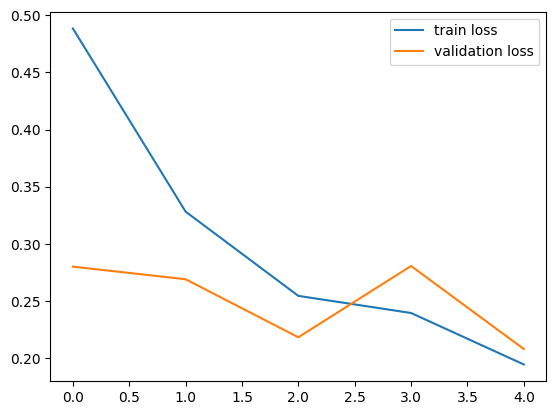

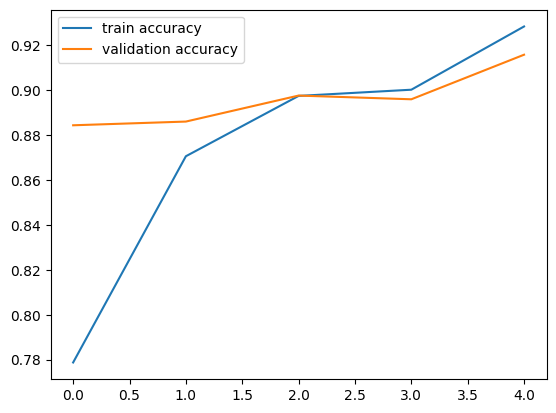

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## Predictive System

Saving Screenshot 2025-11-25 011714.png to Screenshot 2025-11-25 011714 (3).png
Uploaded file: Screenshot 2025-11-25 011714 (3).png


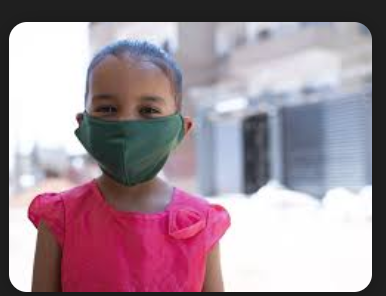

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Raw Prediction: [[0.4012571 0.5060066]]
The person in the image is wearing a mask


In [46]:
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    print("Uploaded file:", filename)

    # Read the uploaded image
    img = Image.open(filename)
    img = img.convert('RGB')
    img_np = np.array(img)

    # Convert RGB → BGR for OpenCV display
    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)



    # Display the uploaded image correctly
    cv2_imshow(img_bgr)

    # Preprocess for model (use RGB as model trained on RGB)
    img_resized = cv2.resize(img_np, (128,128))
    img_scaled = img_resized / 255
    img_reshaped = np.reshape(img_scaled, (1,128,128,3))

    # Predict
    prediction = model.predict(img_reshaped)
    print("Raw Prediction:", prediction)

    predicted_label = np.argmax(prediction)

    # Final Output
    if predicted_label == 1:
        print("The person in the image is wearing a mask")
    else:
        print("The person in the image is NOT wearing a mask")

